## Forecasting Bike Rentals

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#### Getting data

In [5]:
bikesData = pd.read_csv('~/PracticeProjects/hour.csv')
bikesData

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [6]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Data Transformation and EDA

In [8]:
#Dropping some unnecessary columns
bikesData.drop(['instant', 'casual', 'registered', 'atemp', 'dteday'], axis=1, inplace=True)

In [9]:
bikesData

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61


In [10]:
# scaling some atmospheric variables

columnsToScale = ['temp', 'hum', 'windspeed']

scaler = StandardScaler()

bikesData[columnsToScale] = scaler.fit_transform(bikesData[columnsToScale])
bikesData[columnsToScale].describe()

,temp,hum,windspeed
count,1.737900e+04,1.737900e+04,1.737900e+04
mean,3.497212e-16,-4.195150e-16,4.038186e-15
std,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.477205e+00,-3.251166e+00,-1.553889e+00
25%,-8.153035e-01,-7.631431e-01,-6.996886e-01
50%,1.564696e-02,1.436398e-02,3.189880e-02
75%,8.465975e-01,7.918711e-01,5.198962e-01
max,2.612367e+00,1.932215e+00,5.399871e+00


In [11]:
## Adding additional featues for better modeling of BikeRental patterns

#isWorking => 1: is a working day, 2: is a holiday

bikesData['isWorking'] = np.where(np.logical_and(bikesData.workingday == 1, bikesData.holiday == 0), 1, 0)

#monthCount => count of the no. of months from beginning of data

def mnth_cnt(df):
    '''
    Compute the count of months from the start of
    the time series.
    '''
    import itertools
    yr = df['yr'].tolist()
    mnth = df['mnth'].tolist()
    out = [0] * df.shape[0]
    indx = 0
    for x, y in zip(mnth, yr):
        out[indx] = x + 12 * y
        indx += 1
    return out

bikesData['monthCount'] = mnth_cnt(bikesData)

#xformHr => transform by shifting the hours by 5 hrs

bikesData['xfromHr'] = np.where(bikesData.hr > 4, bikesData.hr-5, bikesData.hr+19)

#dayCount => count of days from beginning of dataset

bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

#xformWorkHr => transforming the dataset to make the non-working days to have hours from 25 to 48

bikesData['xformWorkHr'] = (1-bikesData.isWorking)*24 + bikesData.xfromHr

def set_day(df):
    '''
    This function assigns day names to each of the
    rows in the dataset. 
    '''
    ## Assumes the first day of the dataset is Saturday
    days = ["Sat", "Sun", "Mon", "Tue", "Wed", "Thr", "Fri"]
    temp = ['d']*df.shape[0]
    i = 0
    indx = 0
    cur_day = df.weekday[0]
    for day in df.weekday:
        temp[indx] = days[(day-cur_day+7)%7]
        indx += 1
    df['dayWeek'] = temp
    return df

bikesData = set_day(bikesData)

#cntDeTrended => De-trended count values

#creating a linear_model for computing trend
bikesData.sort_values('dayCount', axis= 0, inplace=True)
nrow = bikesData.shape[0]
X = bikesData.dayCount.values.reshape(nrow,1)
Y = bikesData.cnt
clf = linear_model.LinearRegression()
bike_lm = clf.fit(X, Y)

bikesData['cntDeTrended'] = bikesData.cnt - bike_lm.predict(X)

#### Analysing the Dataset

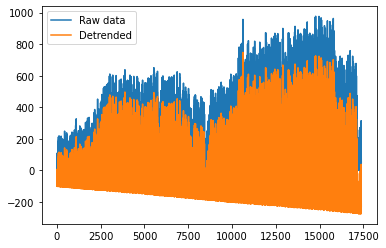

In [13]:
# Hourly count of bikes with and without trend

plt.plot(bikesData.loc[:, 'cnt'])
plt.plot(bikesData.loc[:, 'cntDeTrended'])
plt.legend(['Raw data', 'Detrended'])
plt.show()

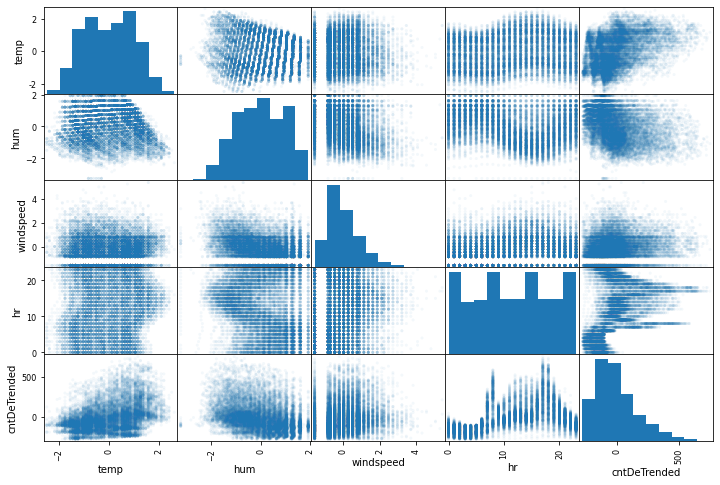

In [14]:
# Plotting scatter matrix for selected attributes: 'temp', 'hum', 'windspeed', 'hr', 'cntDeTrended'

from pandas.plotting import scatter_matrix

columnToPlotScatter = ['temp','hum','windspeed','hr','cntDeTrended']
scatter_matrix(bikesData[columnToPlotScatter], figsize=(12,8), alpha=0.05)
plt.show()

#### Creating Train-Test split for modelling

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)
train_set.sort_values('dayCount', axis=0, inplace=True)
test_set.sort_values('dayCount', axis=0, inplace=True)

print(len(train_set), 'training points and ', len(test_set), 'testing points.')

12165 training points and  5214 testing points.


#### Modelling

We shall make and compare various models

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [20]:
# Training a Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

trainingCols = train_set[['xformWorkHr', 'temp', 'dayCount']]
trainingLabels = train_set['cnt']

rfc_clf = DecisionTreeRegressor(random_state=42)
display_scores(-cross_val_score(rfc_clf, trainingCols, trainingLabels, cv=10, scoring='neg_mean_absolute_error'))
print('\n')
display_scores(np.sqrt(-cross_val_score(rfc_clf, trainingCols, trainingLabels, cv=10, scoring='neg_mean_squared_error')))
train_set_dtr = train_set.copy()
train_set_dtr['predictedCounts'] = cross_val_predict(rfc_clf, trainingCols, trainingLabels, cv=10)
train_set_dtr['resids'] = train_set_dtr['predictedCounts'] - trainingLabels

Scores: [ 29.37222679  48.46507806  37.08874281  54.01643385  54.47411668
  57.77138158  64.79029605  63.81414474  55.57401316 100.21052632]
Mean: 56.557696003438124
Standard deviation: 17.952218990725587


Scores: [ 45.95970154  74.51177712  58.77977925  88.94009321  87.18584406
  90.6675626  106.76725101 100.5444717   92.66354674 154.47246284]
Mean: 90.04924900874488
Standard deviation: 27.784382154078404


In [21]:
# Training a Linear Regression Model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
display_scores(-cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring='neg_mean_absolute_error'))
print('\n')
display_scores(np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring='neg_mean_squared_error')))
train_set_lin = train_set.copy()
train_set_lin['predictedCounts'] = cross_val_predict(lin_reg, trainingCols, trainingLabels, cv=10)
train_set_lin['resids'] = train_set_lin['predictedCounts'] - trainingLabels

Scores: [ 62.29527472  90.60871832 134.99710104 120.7050177   87.65203691
  95.09526459 153.68788949 177.0099255  183.21306065 137.61263548]
Mean: 124.28769244195298
Standard deviation: 38.20076938330655


Scores: [ 79.02462583 119.71270616 154.46146441 143.1340909  110.38911514
 129.89481215 198.27301911 210.5833168  229.90475061 176.62358571]
Mean: 155.20014868275672
Standard deviation: 45.62773468813691


In [22]:
# Training a Random Forrest ensemble model

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=40, random_state=42)
display_scores(-cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring='neg_mean_absolute_error'))
print('\n')
display_scores(np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring='neg_mean_squared_error')))
train_set_freg = train_set.copy()
train_set_freg['predictedCounts'] = cross_val_predict(forest_reg, trainingCols, trainingLabels, cv=10)
train_set_freg['resids'] = train_set_freg['predictedCounts'] - trainingLabels

Scores: [26.07551356 37.45792933 32.1267461  43.11828266 43.25595727 48.12541118
 55.84251645 52.82652138 47.65933388 73.29340049]
Mean: 45.97816123117404
Standard deviation: 12.545619145343972


Scores: [ 41.3152194   58.94087734  49.70129401  69.91267933  70.63000993
  76.74023564  90.24194458  80.83799636  80.11283276 112.17584682]
Mean: 73.06089361900376
Standard deviation: 19.281008377259905


#### Visualizing predicted vs actual values

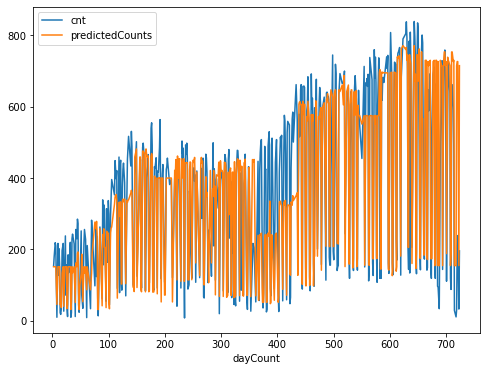

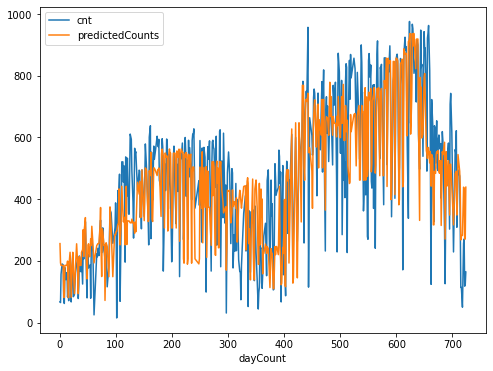

In [24]:
times = [8, 17]

for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    train_set_freg_time = train_set_freg[train_set.hr == time]
    train_set_freg_time.plot(kind='line', x='dayCount', y='cnt', ax=ax)
    train_set_freg_time.plot(kind='line', x='dayCount', y='predictedCounts', ax=ax)
    plt.show()

#### Fine-tuning model

In [26]:
# assigning different combination of max_dept and min_samples_leaf and min_samples_split to param_grid

from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth' : [28,30,32,34,36], 'min_samples_leaf' : [5,10,15,12], 'min_samples_split' : [120,128,136]},]

grid_search = GridSearchCV(rfc_clf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(trainingCols, trainingLabels)
print(grid_search.best_params_)

{'max_depth': 28, 'min_samples_leaf': 12, 'min_samples_split': 120}


#### Evaluating test data on final model

In [28]:
# preparing test_set

test_x_cols = ['xformWorkHr', 'temp', 'dayCount']
test_y_cols = 'cnt'

X_test = test_set.loc[:, test_x_cols]
y_test = test_set.loc[:, test_y_cols]

In [29]:
# model

final_model = grid_search.best_estimator_

test_set.loc[:, 'predictedCount_test'] = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, test_set.loc[:, 'predictedCount_test'])
print(np.sqrt(final_mse))

62.18673266056164


#### Visualizing predicted vs actual values

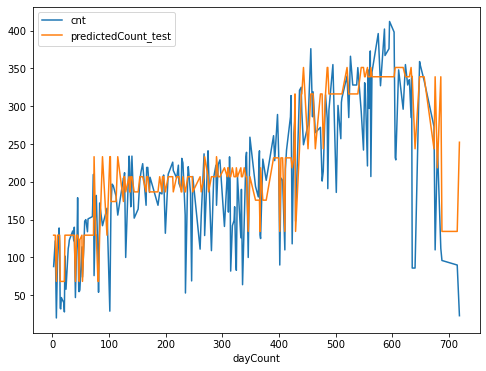

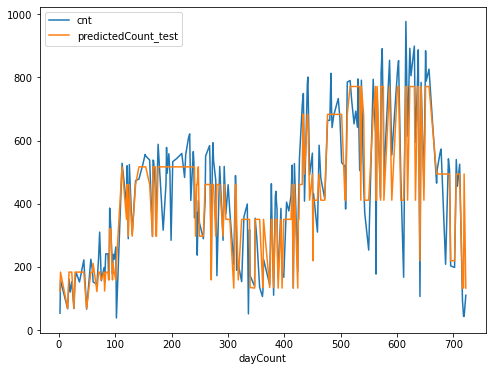

In [31]:
times = [9,18]

for time in times:
    fig = plt.figure(figsize=(8,6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind='line', x='dayCount', y='cnt', ax=ax)
    test_set_freg_time.plot(kind='line', x='dayCount', y='predictedCount_test', ax=ax)
    plt.show()

## Building Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [34]:
bikesData = pd.read_csv('~/PracticeProjects/hour.csv')

columnsToDrop = ['instant','casual','registered','atemp','dteday']
bikesData = bikesData.drop(labels=columnsToDrop,axis=1)

bikesData['isWorking'] = np.where(np.logical_and(bikesData.workingday==1,bikesData.holiday==0),1,0)
bikesData['monthCount'] = mnth_cnt(bikesData)
bikesData['xformHr'] = np.where(bikesData.hr>4,bikesData.hr-5,bikesData.hr+19)
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24
bikesData['xformWorkHr'] = bikesData.isWorking*24 + bikesData.xformHr
bikesData = set_day(bikesData)

columnsToScale = ['temp', 'hum', 'windspeed']
scaler = StandardScaler()
bikesData[columnsToScale] = scaler.fit_transform(bikesData[columnsToScale])

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, obj = True): # no *args or **kargs
        self.obj = obj
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        isWorking = np.where(np.logical_and(X.loc[:,'workingday']==1,X.loc[:,'holiday']==0),1,0)
        xformHr = np.where(X.loc[:,'hr']>4,X.loc[:,'hr']-5,X.loc[:,'hr']+19)
        xformWorkHr = isWorking*24 + xformHr
        return np.c_[X, isWorking, xformHr, xformWorkHr]
    
attr_adder = CombinedAttributesAdder()
bikesData1 = attr_adder.transform(bikesData)
bikesData = pd.DataFrame(bikesData1, columns=list(bikesData.columns)+["isWorking", "xformHr", "xformWorkHr"])
bikesData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,...,xformHr,dayCount,xformWorkHr,dayWeek,isWorking,xformHr,xformWorkHr,isWorking,xformHr,xformWorkHr
0,1,0,1,0,0,6,0,1,-1.334648,0.947372,...,19,0.0,19,Sat,0,19,19,0,19,19
1,1,0,1,1,0,6,0,1,-1.438516,0.895539,...,20,0.041667,20,Sat,0,20,20,0,20,20
2,1,0,1,2,0,6,0,1,-1.438516,0.895539,...,21,0.083333,21,Sat,0,21,21,0,21,21
3,1,0,1,3,0,6,0,1,-1.334648,0.63637,...,22,0.125,22,Sat,0,22,22,0,22,22
4,1,0,1,4,0,6,0,1,-1.334648,0.63637,...,23,0.166667,23,Sat,0,23,23,0,23,23
